# 📢 File explanation!!

Pada tahap ini, saya akan fokus melakukan Exploratory Data Analysis (EDA) terhadap data tanpa melakukan preprocessing terlebih dahulu. Preprocessing data akan dilakukan pada file selanjutnya.

# 🎯 **Step 0: Import library**
---

In [27]:
!pip -q install tldextract

In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tldextract

from sklearn.feature_extraction.text import CountVectorizer

In [29]:
plt.style.use('seaborn-v0_8')

In [30]:
matplotlib.__version__

'3.7.1'

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🎯 **Step 1: Load dataset**
---

In [32]:
df_combined = pd.read_excel('/content/drive/MyDrive/SKILL ACADEMY/FINAL PROJECT/Dataset/URL/URL.xlsx')

df_combined.head()

,Category,Data
0,spam,logtelstra2021.ddnsking.com/0dfa1b53b835500696...
1,spam,dvsber.ru/modules/mod_ariimageslidersa/KRENK3N...
2,spam,kimsinc564.000webhostapp.com/notification.php?...
3,spam,benjim.com/all
4,spam,www.m.micesrunescape.com-we.ru/


In [33]:
df_combined.rename(columns={'Data': 'URL'}, inplace=True)
df_combined['Category'].replace({'spam': 'phishing', 'ham': 'non-phishing'}, inplace=True)

# df_combined['URL'].loc[0]

In [34]:
# df_url_second = pd.read_csv('/content/drive/MyDrive/SKILL ACADEMY/FINAL PROJECT/Dataset/URL/second_dataset_url.csv')

# df_url_second.head()

In [35]:
# df_combined = pd.concat([df_url_first[['Category', 'URL']], df_url_second[['Category', 'URL']]])

# df_combined.head()

In [36]:
# file_path = '/content/drive/MyDrive/SKILL ACADEMY/FINAL PROJECT/Dataset/URL/combined_dataset_url.csv'

# df_combined.to_csv(file_path, index=False)

# 🎯 **Step 2: Check data info**
---

In [37]:
# df_url_first.info()

In [38]:
# df_url_second.info()

In [39]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45373 entries, 0 to 45372
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  45373 non-null  object
 1   URL       45373 non-null  object
dtypes: object(2)
memory usage: 709.1+ KB


🚧 Berdasarkan informasi di atas dapat disimpulkan datasetnya tidak terdapat null values


# 🎯 **Step 3: Check duplicate data**
---

In [40]:
duplicate = df_combined['URL']

duplicate.duplicated().sum()

1295

In [41]:
duplicate_rows = duplicate[duplicate.duplicated()]

duplicate_rows.head()

662                       www.m.micesrunescape.com-we.ru/
820                                            rabot.dev/
1900    eagle10.firebaseapp.com/wp-content/plugins/app...
2211                        servlces.runescape.com-ov.ru/
2660    mirbuketoff.market/tabs/ali/baba/ali1/ali/logi...
Name: URL, dtype: object

In [42]:
duplicate_counts = duplicate_rows.value_counts()

df_duplicate_counts = pd.DataFrame({'Value': duplicate_counts.index, 'Count': duplicate_counts.values})

df_duplicate_counts.head()

,Value,Count
0,t.msg.bmwusa.com/r/?id=h85ee99b,3
1,www.m.micesrunescape.com-we.ru/,1
2,amazon.nnwgxxe.cn/signim/?openid.pape.max_auth...,1
3,arnaznn.co.ip.ekdrsss.asia/,1
4,portableltes.firebaseapp.com/bank/cibc/cibc/al...,1


In [43]:
df_duplicate_counts['Count'].sum()

1295

🚧 Berdasarkan informasi di atas dan setelah saya cek secara manual memang benar data-data tersebut ada yang terduplikasi sehingga nanti harus dihapus data terduplikasi tersebut.

# 🎯 **Step 4: Compare the distribution of the "Category" column.**

---



In [44]:
url_counts = df_combined['Category'].value_counts(ascending=True)

url_counts

phishing        22686
non-phishing    22687
Name: Category, dtype: int64

<ipython-input-45-6e09ab02d5d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')


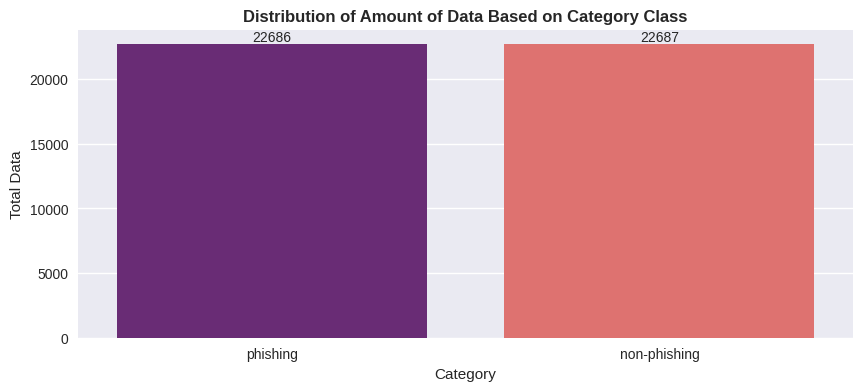

In [45]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Category')

plt.ylabel('Total Data')

plt.title('Distribution of Amount of Data Based on Category Class', fontweight="bold")

plt.show()

🚧 Berdasarkan grafik di atas dapat diketahui bahwa sebaran data tidak seimbang sehingga perlu dilakukan balancing data

# 🎯 **Step 5: Check URL length**

---

In [46]:
df_combined['url_length'] = df_combined['URL'].apply(len)

## ✨ 5.1 - Barplot

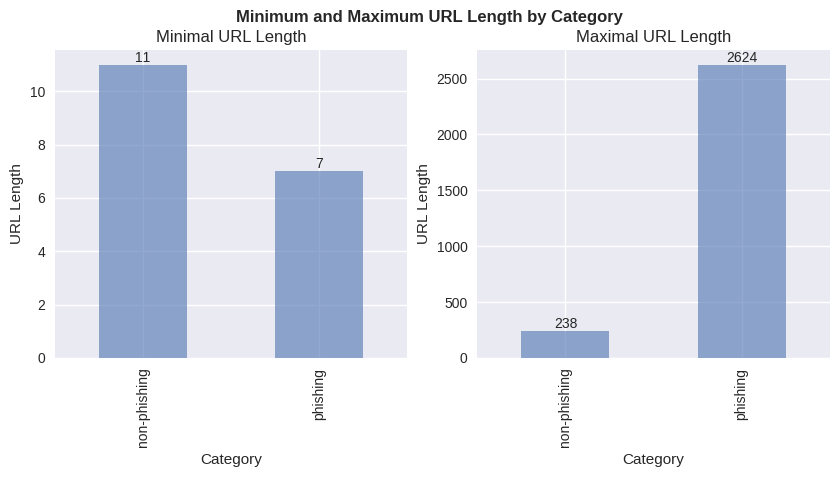

In [47]:
def plot_text_length(df, column, label):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle('Minimum and Maximum URL Length by Category', fontweight="bold")

    df.groupby(label)[column].min().plot(kind='bar', ax=axes[0], alpha=0.6)
    axes[0].set_title('Minimal URL Length')
    axes[0].set_ylabel('URL Length')
    for p in axes[0].containers:
        axes[0].bar_label(p,)

    df.groupby(label)[column].max().plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Maximal URL Length')
    axes[1].set_ylabel('URL Length')
    for p in axes[1].containers:
        axes[1].bar_label(p,)

    plt.show()

plot_text_length(df_combined, 'url_length', 'Category')

🚧 Berdasarkan grafik di atas dapat diketahui sebagai berikut:
- Panjang minimal url untuk kategori Phishing ialah sekitar 7 dan maksimal panjangnya sekitar 2624
- Panjang minimal url untuk kategori Non-Phishing ialah sekitar 11 dan maksimal panjangnya sekitar 6097

Kategori yang mempunyai panjang url terpendek ialah Phishing

## ✨ 5.2 - Boxplot

<ipython-input-48-b4ae2edbf0d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Category', y='url_length', data=df_combined, palette='rocket', whis=3.0)


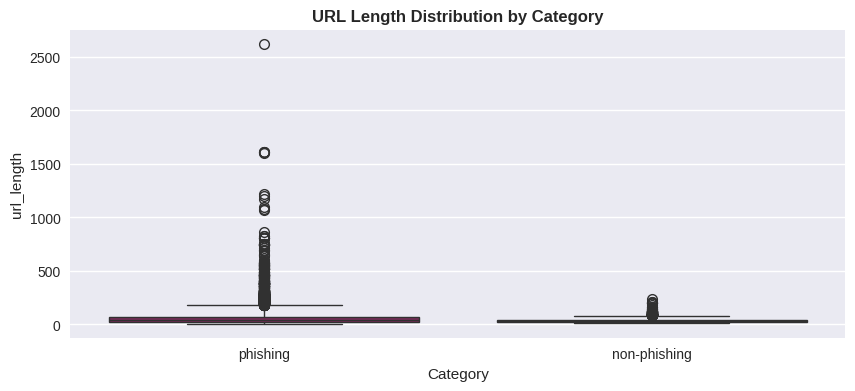

In [48]:
plt.figure(figsize=(10, 4))

ax = sns.boxplot(x='Category', y='url_length', data=df_combined, palette='rocket', whis=3.0)

plt.title('URL Length Distribution by Category', fontweight="bold")

plt.show()

In [49]:
df_combined.groupby('Category')['url_length'].mean()

Category
non-phishing    35.929078
phishing        60.147933
Name: url_length, dtype: float64

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya mayoritas panjang url ialah melebih Q3 dari data baik URL Phishing maupun Non-phishing. Kemudian rata-rata panjang url kategori Non-Phishing ialah sekitar 44 dan Phishing sekitar 31.

# 🎯 **Step 6: Check the words unigram, bigram, trigrams that often appear**

---


🔎 Pada tahap ini saya menggunakan perpustakaan `CountVectorizer` dari Sklearn untuk menghitung frekuensi kemunculan kata dari unigram, bigram, dan trigram. Lalu saya filter untuk menampilkan 10 kata teratas yang paling banyak kemunculannya

In [50]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Data': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # axes[1, 1].axis('off')

    for i, plot_info in enumerate(plot_data):

        ax = axes[i]

        sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'], fontweight="bold")

    plt.tight_layout()

    plt.show()

In [51]:
df_phishing = df_combined[df_combined['Category'] == 'phishing']

df_nonphishing = df_combined[df_combined['Category'] == 'non-phishing']

## ✨ 6.1 - Unigram

In [52]:
stop_words = None

n = 10

unigram_phishing = get_top_ngrams(df_phishing['URL'], (1, 1), stop_words, n)

unigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (1, 1), stop_words, n)

unigram_phishing.head()


,Data,Frequency
0,com,13741
1,php,3370
2,www,3340
3,html,2340
4,login,2019


<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


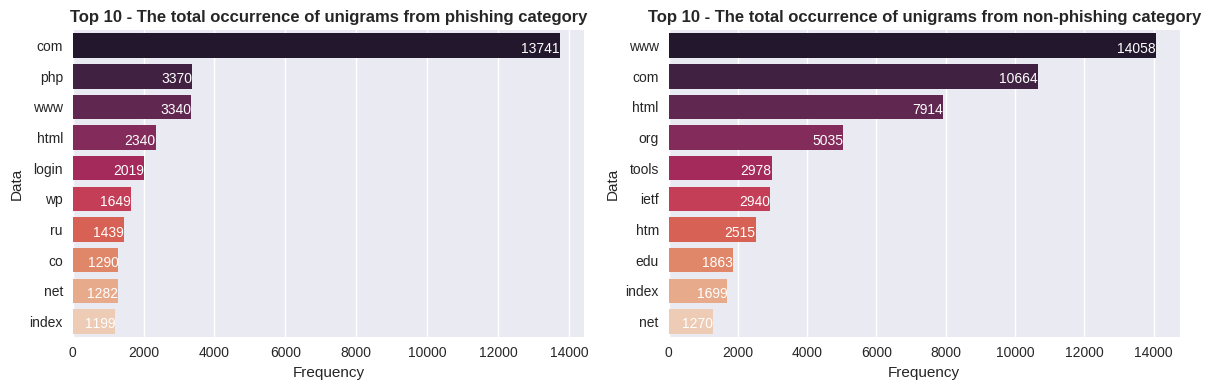

In [53]:
plot_data = [

    {'data': unigram_phishing, 'title': 'Top 10 - The total occurrence of unigrams from phishing category'},

    {'data': unigram_nonphishing, 'title': 'Top 10 - The total occurrence of unigrams from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya unigram 'www' dan 'com' menempati posisi 3 teratas pada kategori Phishing maupun Non-Phishing

## ✨ 6.2 - Bigram

In [54]:
stop_words = None

n = 10

bigram_phishing = get_top_ngrams(df_phishing['URL'], (2, 2), stop_words, n)

bigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (2, 2), stop_words, n)

bigram_phishing.head()


,Data,Frequency
0,runescape com,898
1,login php,869
2,com wp,827
3,wp content,718
4,000webhostapp com,694


<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


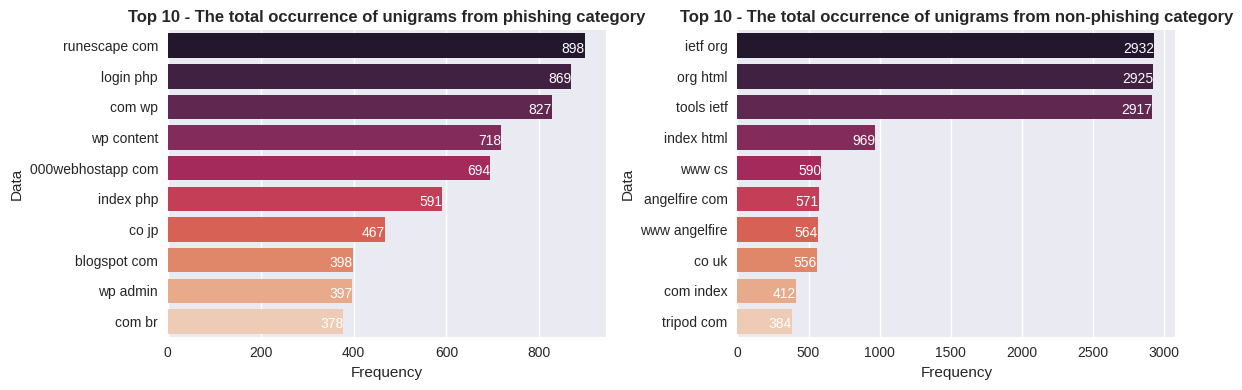

In [55]:
plot_data = [

    {'data': bigram_phishing, 'title': 'Top 10 - The total occurrence of unigrams from phishing category'},

    {'data': bigram_nonphishing, 'title': 'Top 10 - The total occurrence of unigrams from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya 3 posisi teratas tidaklah sama pada 2 kategori tersebut

## ✨ 6.3 - Trigram

In [56]:
stop_words = None

n = 10

trigram_phishing = get_top_ngrams(df_phishing['URL'], (3, 3), stop_words, n)

trigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (3, 3), stop_words, n)

trigram_phishing.head()


,Data,Frequency
0,com wp content,295
1,php cmd login_submit,285
2,login php cmd,267
3,com wp admin,246
4,com wp includes,229


<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


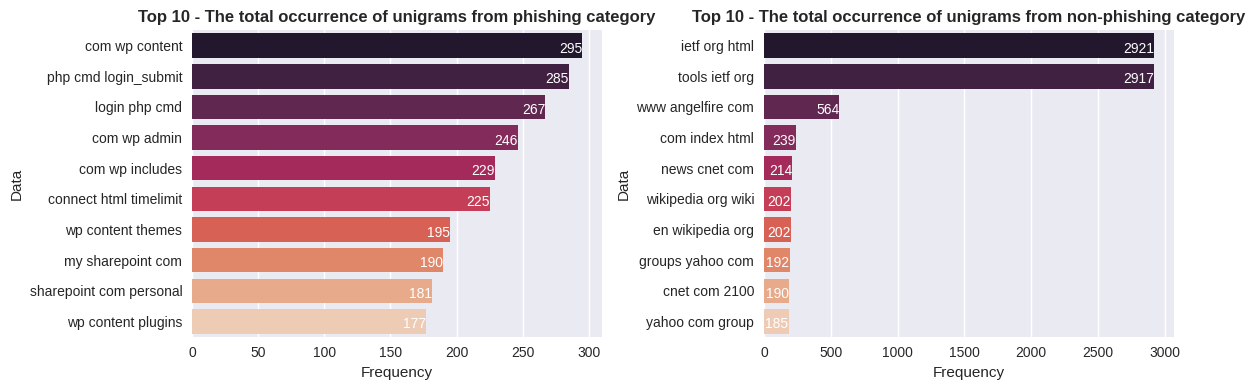

In [57]:
plot_data = [

    {'data': trigram_phishing, 'title': 'Top 10 - The total occurrence of unigrams from phishing category'},

    {'data': trigram_nonphishing, 'title': 'Top 10 - The total occurrence of unigrams from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya 3 posisi teratas tidaklah sama pada 2 kategori tersebut

# 🎯 **Step 7: Extraction of sub domains, domains and top level domains**

---


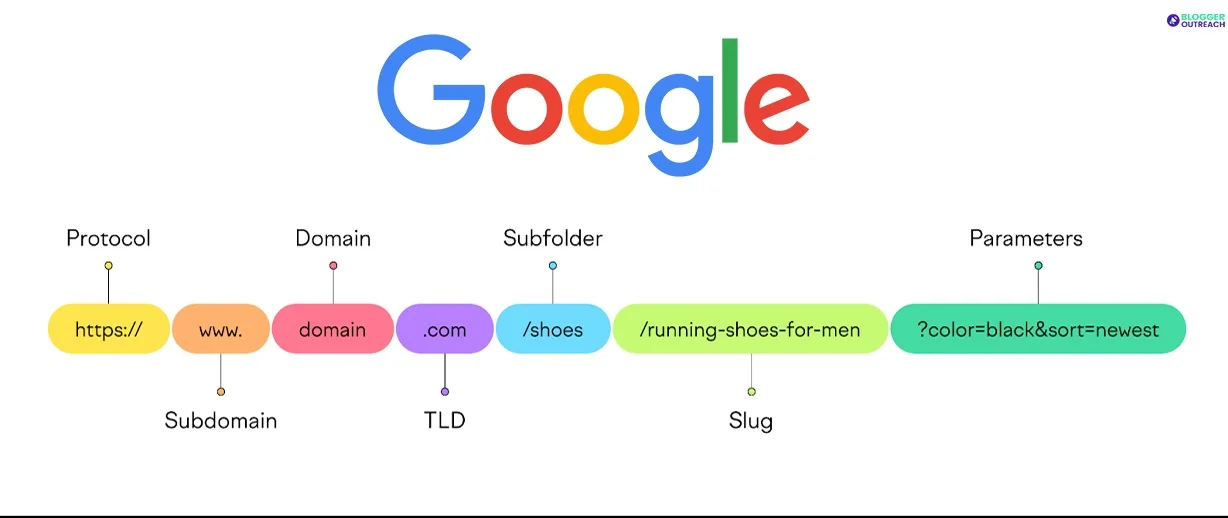

🔎 Saya melakukan ekstraksi subdomain, domain, dan TLD untuk mengetahui distribusi masing-masing dari ketiga tersebut mana yang paling digunakan untuk phishing.

In [58]:
# df_url[['sub_domain', 'domain', 'tld']] = df_url['Data'].apply(lambda x: pd.Series([getattr(tldextract.extract(x), attr) for attr in ['subdomain', 'domain', 'suffix']]))


tld_info = df_combined['URL'].apply(lambda x: tldextract.extract(x))

df_combined['sub_domain'] = tld_info.apply(lambda x: x.subdomain)
df_combined['domain'] = tld_info.apply(lambda x: x.domain)
df_combined['tld'] = tld_info.apply(lambda x: x.suffix)

df_combined.head()

,Category,URL,url_length,sub_domain,domain,tld
0,phishing,logtelstra2021.ddnsking.com/0dfa1b53b835500696...,61,logtelstra2021,ddnsking,com
1,phishing,dvsber.ru/modules/mod_ariimageslidersa/KRENK3N...,82,,dvsber,ru
2,phishing,kimsinc564.000webhostapp.com/notification.php?...,63,kimsinc564,000webhostapp,com
3,phishing,benjim.com/all,14,,benjim,com
4,phishing,www.m.micesrunescape.com-we.ru/,31,www.m.micesrunescape,com-we,ru


In [59]:
df_phishing = df_combined[df_combined['Category'] == 'phishing']

df_nonphishing = df_combined[df_combined['Category'] == 'non-phishing']

## ✨ 7.1 - Distribution top level domain

In [60]:
tld_counts_phishing = df_phishing['tld'].value_counts().reset_index()
tld_counts_nonphishing = df_nonphishing['tld'].value_counts().reset_index()

tld_counts_phishing.head()

,index,tld
0,com,10286
1,ru,1408
2,net,872
3,org,749
4,cn,485


In [63]:
tld_counts_phishing.rename(columns={'index': 'Data', 'tld': 'Frequency'}, inplace=True)
tld_counts_nonphishing.rename(columns={'index': 'Data', 'tld': 'Frequency'}, inplace=True)

tld_counts_phishing.head()

,Data,Frequency
0,com,10286
1,ru,1408
2,net,872
3,org,749
4,cn,485


<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


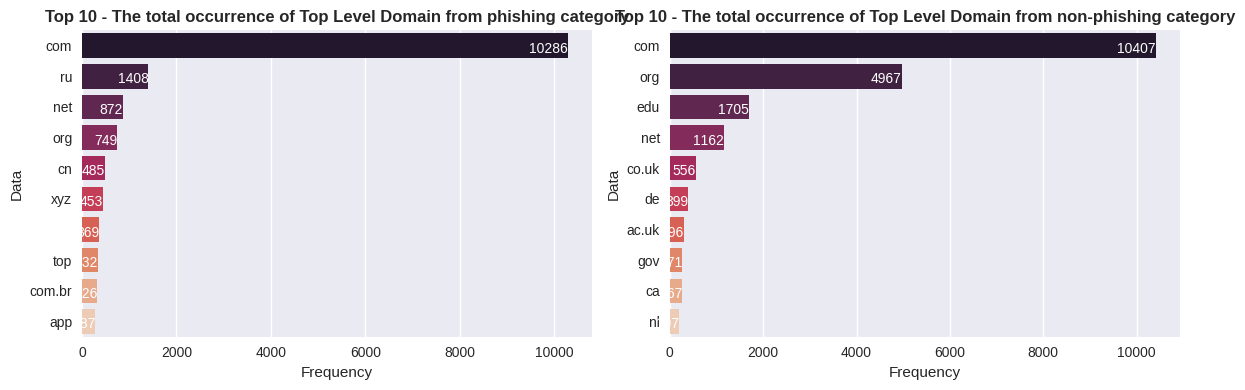

In [71]:
plot_data = [

    {'data': tld_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of Top Level Domain from phishing category'},

    {'data': tld_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of Top Level Domain from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya posisi pertama ditempati oleh top level domain 'com'. Akan tetapi hal ini tidak bisa menjadi dasar informasi untuk mengklasifikasikan suatu url phishing atau tidak. Akan tetapi ada hal yang menarik pada kategori Phishing, penyerang ternyata rela menggelontorkan uang untuk memakai domain .com

## ✨ 7.2 - Distribution domain

In [65]:
domain_counts_phishing = df_phishing['domain'].value_counts().reset_index()
domain_counts_nonphishing = df_nonphishing['domain'].value_counts().reset_index()

domain_counts_phishing.head()

,index,domain
0,000webhostapp,694
1,blogspot,464
2,duckdns,329
3,firebaseapp,314
4,google,290


In [66]:
domain_counts_phishing.rename(columns={'index': 'Data', 'domain': 'Frequency'}, inplace=True)
domain_counts_nonphishing.rename(columns={'index': 'Data', 'domain': 'Frequency'}, inplace=True)

domain_counts_phishing.head()

,Data,Frequency
0,000webhostapp,694
1,blogspot,464
2,duckdns,329
3,firebaseapp,314
4,google,290


<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


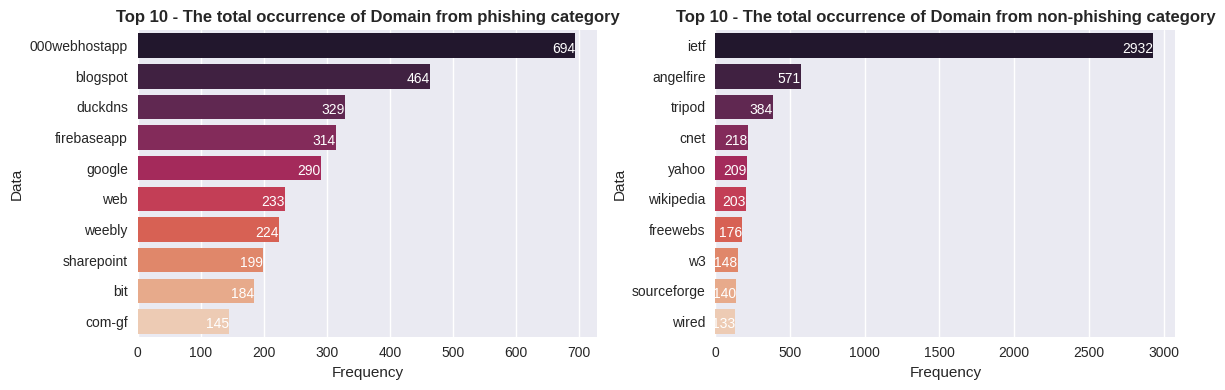

In [67]:
plot_data = [

    {'data': domain_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of Domain from phishing category'},

    {'data': domain_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of Domain from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Mmm, sungguh menarik bahwasanya orang yang membuat link phishing menggunakan domain yang gratis dan tidak bermodal.

## ✨ 7.3 - Distribution subdomain

In [68]:
subdomain_counts_phishing = df_phishing['sub_domain'].value_counts().reset_index()
subdomain_counts_nonphishing = df_nonphishing['sub_domain'].value_counts().reset_index()

subdomain_counts_phishing.head()

,index,sub_domain
0,,9445
1,www,1986
2,nicenecei,128
3,clouddoc-authorize,123
4,mail,116


In [69]:
subdomain_counts_phishing.rename(columns={'index': 'Data', 'sub_domain': 'Frequency'}, inplace=True)
subdomain_counts_nonphishing.rename(columns={'index': 'Data', 'sub_domain': 'Frequency'}, inplace=True)

subdomain_counts_phishing.head()

,Data,Frequency
0,,9445
1,www,1986
2,nicenecei,128
3,clouddoc-authorize,123
4,mail,116


<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-50-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


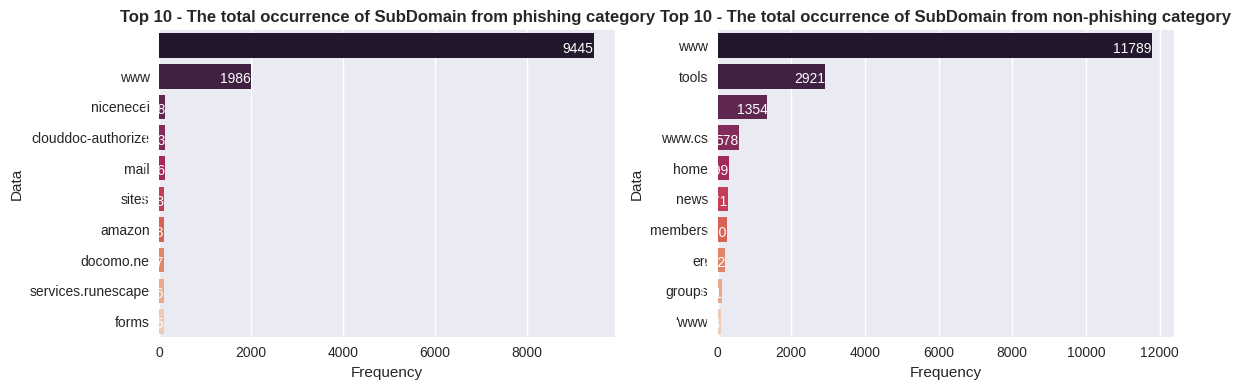

In [70]:
plot_data = [

    {'data': subdomain_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of SubDomain from phishing category'},

    {'data': subdomain_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of SubDomain from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasar hasil analisis saya  www menempati urutan pertama pada kategori Non-Phishing. Akan tetapi terdapat beberapa yang tidak mempunyai subdomain yang menempati posisi teratas